In [ ]:
# Installing necessary libraries

# gensim 4.3.3 requires numpy<2.0,>=1.18.5
# numba 0.60.0 requires numpy<2.1,>=1.22
# scipy 1.13.1 requires numpy<2.3,>=1.22.4

!pip install "opencv-python<4.9.0" --force-reinstall
!pip install numpy==1.26.4 --force-reinstall

In [13]:
#importing libraries
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [222]:
# Create drawing folder if It does not exist
drawing_folder = os.path.join(os.getcwd(), "drawing")
os.makedirs(drawing_folder, exist_ok=True)

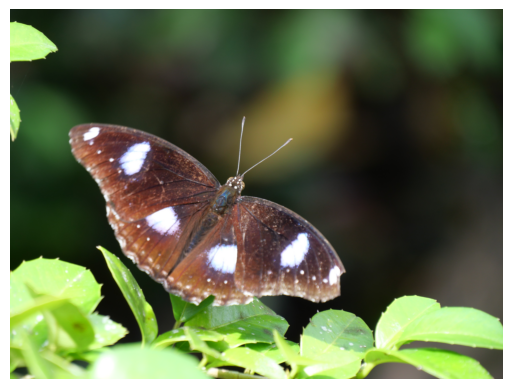

In [224]:
# File path to image 
img_path = os.path.join(os.getcwd(), "Sample", "Img (3).JPG")

# Reading image
image = cv2.imread(img_path)

# If image is opened correctly you should see it, otherwise you will see its type
if (image is None):
    print("Expected image got")
    print(type(image))
else:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

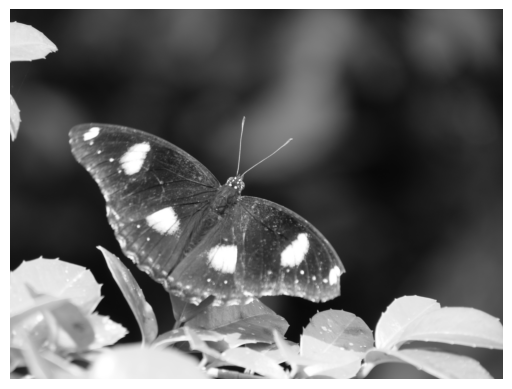

In [226]:
# Turning image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applying blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Getting edges with canny
canny = cv2.Canny(blur, 20, 55)

# Blured grayscale image
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

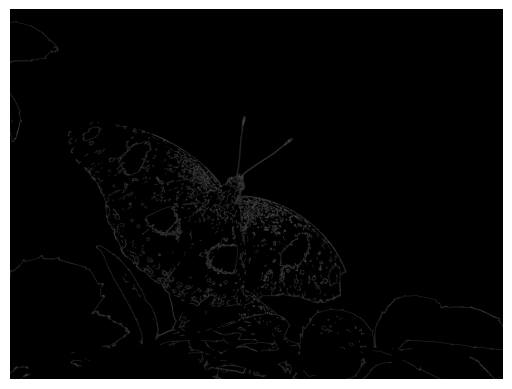

In [228]:
# All edges
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

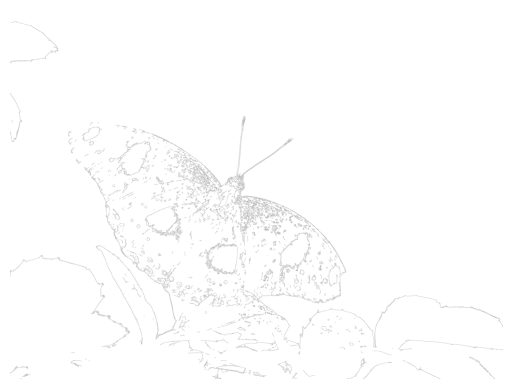

True

In [230]:
# Canny gives: white lines (255) on black (0)
# We want: white background (255), black lines (0)
# → Simply invert the image:
drawing = 255 - canny

plt.imshow(drawing, cmap='gray')
plt.axis('off')
plt.show()

# Save result to folder
output_name = "drawing_img3.png"
output_path = os.path.join(drawing_folder, output_name)

cv2.imwrite(output_path, drawing)

In [31]:
# =======================================================
# OUTPUT FOLDER
# =======================================================

output_folder = "output"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Created output folder: {output_folder}")
else:
    print(f"Folder '{output_folder}' already exists")

Folder 'output' already exists


In [53]:
# =======================================================
# MANUAL INPUT (run this if using locally)
# =======================================================

file_path = "Sample/Img (10).JPG"

In [ ]:
# =======================================================
# GOOGLE COLAB UPLOADER (run this if using colab)
# =======================================================

from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

In [57]:
# =======================================================
# LOAD IMAGE
# =======================================================

image = cv2.imread(file_path)
if image is None:
    raise ValueError("Could not load image file.")

In [59]:
# =======================================================
# NOISE REDUCTION (optional, not always better)
# =======================================================

# Non-local means strong denoiser
denoised = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

# Bilateral filtering (keeps edges sharp)
bilateral = cv2.bilateralFilter(denoised, 9, 75, 75)

# Convert to grayscale
gray = cv2.cvtColor(bilateral, cv2.COLOR_BGR2GRAY)

# Morphological smoothing
kernel = np.ones((5, 5), np.uint8)
smooth = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)

In [60]:
# =======================================================
# MINIMAL NOISE REDUCTION
# =======================================================

# Turn image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply some blur
smooth = cv2.GaussianBlur(gray, (5, 5), 0)

In [63]:
# =======================================================
# EDGE DETECTION
# =======================================================

# for images taken with professional equipment 20 40
# for buildings 80 140
# for images from other sources change as needed
edges = cv2.Canny(smooth, 80, 140)
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8), iterations=2)

# =======================================================
# FIND MAIN CONTOUR
# =======================================================

contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    raise ValueError("No contours detected.")

main_contour = max(contours, key=cv2.contourArea)
area_px = cv2.contourArea(main_contour)
print("Detected largest area:", int(area_px), "px²")

Detected largest area: 244001 px²


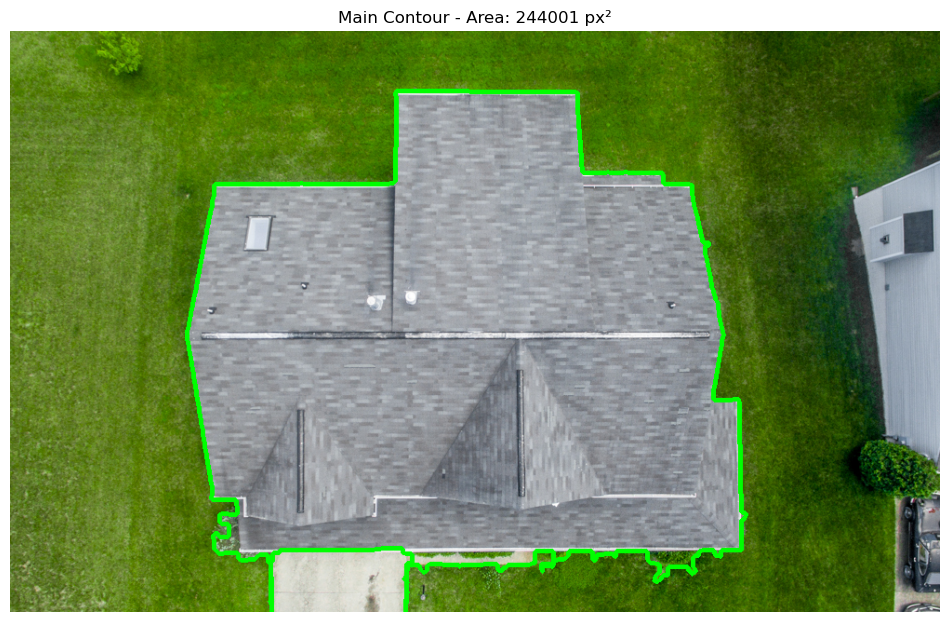

In [65]:
# =======================================================
# CREATE OUTPUT IMAGES
# =======================================================

h, w = gray.shape

# --- 1. Contour-only black on white ---
white_bg = np.ones((h, w), dtype=np.uint8) * 255
contour_only = white_bg.copy()
cv2.drawContours(contour_only, [main_contour], -1, 0, 2)

# --- 2. Colored contour overlay ---
overlay = image.copy()
cv2.drawContours(overlay, [main_contour], -1, (0, 255, 0), 3)

# =======================================================
# SHOW RESULT
# =======================================================

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title(f"Main Contour - Area: {int(area_px)} px²")
plt.axis("off")
plt.show()

In [67]:
# =======================================================
# GENERATE SAVE PATHS
# =======================================================

base_name = os.path.splitext(os.path.basename(file_path))[0]

contour_path = os.path.join(output_folder, f"{base_name}_contour.png")
overlay_path = os.path.join(output_folder, f"{base_name}_overlay.png")

# =======================================================
# SAVE FILES
# =======================================================

cv2.imwrite(contour_path, contour_only)
cv2.imwrite(overlay_path, overlay)

True

In [ ]:
# =======================================================
# SAVE CONTOURS TO CSV
# =======================================================

import csv

csv_path = os.path.join(output_folder, f"{base_name}_contour_points.csv")

with open(csv_path, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["x", "y"])  # header
    
    for point in main_contour:
        x, y = point[0]    # contour format is [[[x, y]]]
        writer.writerow([x, y])